#1. Pendahuluan
#1.1. Import Library

In [0]:
# import tensorflow as tf
import matplotlib.pyplot as plt
# from tf.examples.tutorials.mnist import input_data # change tf 2.0
from matplotlib import pyplot
# Start interactive session # change tf 2.0
# sess = tf.InteractiveSession() # change tf 2.0

In [2]:
# change tf 2.0
!git clone https://github.com/tensorflow/tensorflow.git
import sys
sys.path.append('/content/tensorflow/tensorflow/examples/tutorials/mnist')
import input_data

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
sess = tf.InteractiveSession() # change tf 2.0
# sess = tf.compat.v1.InteractiveSession()

Cloning into 'tensorflow'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 905840 (delta 0), reused 7 (delta 0), pack-reused 905833
Receiving objects: 100% (905840/905840), 530.36 MiB | 29.49 MiB/s, done.
Resolving deltas: 100% (735782/735782), done.
Checking out files: 100% (22046/22046), done.
Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
fashion_mnist = input_data.read_data_sets('data/fashion', one_hot=True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [4]:
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: File exists
--2020-05-28 22:15:37--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.232
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  92.7MB/s    in 0.3s    

2020-05-28 22:15:37 (92.7 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2020-05-28 22:15:39--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.ama

In [5]:
fashion_mnist = input_data.read_data_sets('data/fashion', one_hot=True)
print (fashion_mnist)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
_Datasets(train=<input_data._DataSet object at 0x7f01e5a6e2e8>, validation=<input_data._DataSet object at 0x7f01a3438ef0>, test=<input_data._DataSet object at 0x7f01a3438d30>)


In [6]:
type(fashion_mnist)

input_data._Datasets

#1.2 Bentuk Dataset

In [7]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [8]:
fashion_data = fashion_mnist.train.images
print(fashion_data.shape)

(55000, 784)


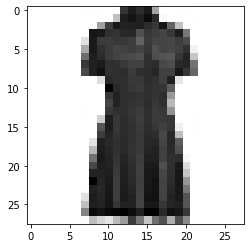

In [9]:
sample_1 = fashion_mnist.train.images[47].reshape(28,28)
plt.imshow(sample_1, cmap='Greys')

In [10]:
print(fashion_mnist.train.images[47])

[0.         0.         0.         0.         0.         0.
 0.         0.00784314 0.01176471 0.00392157 0.         0.
 0.82745105 0.8980393  0.854902   0.909804   0.45098042 0.
 0.         0.00784314 0.00392157 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.35686275 0.8980393  0.9294118
 0.89019614 0.9568628  0.8588236  0.04313726 0.         0.
 0.         0.00392157 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00784314 0.46274513
 0.8078432  0.9215687  0.87843144 0.8862746  0.8980393  0.854902
 0.8235295  0.9294118  0.68235296 0.35686275 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.92549026 0.91372555 0.8431373  0.8352942
 0.86666673 0.8705883  0.756

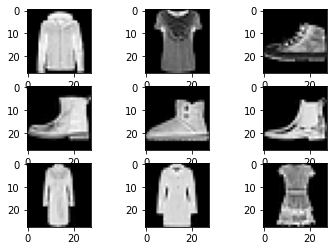

In [11]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(fashion_mnist.train.images[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

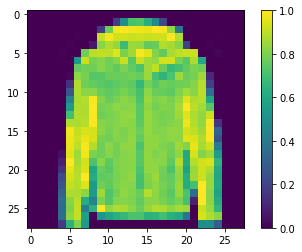

In [12]:
plt.figure()
plt.imshow(fashion_mnist.train.images[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


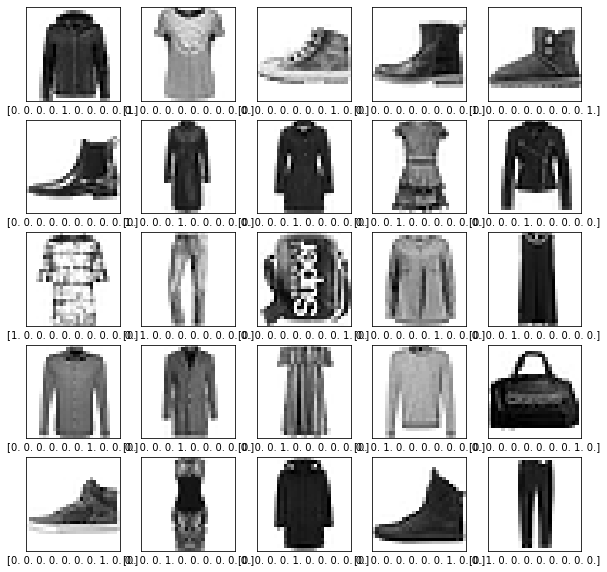

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fashion_mnist.train.images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(fashion_mnist.train.labels[i])
plt.show()

#1.3 Initial Parameter
Membuat parameter umum untuk model

In [0]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

#1.4 Input dan Output
Membuat placeholder untuk input dan output

In [0]:
x  = tf.placeholder(tf.float32, shape=[None, flat]) # change tf 2.0
y_ = tf.placeholder(tf.float32, shape=[None, class_output]) # change tf 2.0

In [16]:
x_image = tf.reshape(x, [-1,28,28,1])  
x_image

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

In [0]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [0]:
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

In [0]:
h_conv1 = tf.nn.relu(convolve1)

In [20]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

In [0]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [0]:
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')+ b_conv2

In [0]:
h_conv2 = tf.nn.relu(convolve2)

In [24]:
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

In [0]:
layer2_matrix = tf.reshape(conv2, [-1, 7*7*64])

In [0]:
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [0]:
fcl=tf.matmul(layer2_matrix, W_fc1) + b_fc1

In [28]:
h_fc1 = tf.nn.relu(fcl)
h_fc1

<tf.Tensor 'Relu_2:0' shape=(?, 1024) dtype=float32>

In [29]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<tf.Tensor 'dropout/Mul:0' shape=(?, 1024) dtype=float32>

In [0]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [0]:
fc=tf.matmul(layer_drop, W_fc2) + b_fc2

In [32]:
y_CNN= tf.nn.softmax(fc)
y_CNN

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

In [33]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))
cross_entropy

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [34]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
train_step

<tf.Operation 'Adam' type=NoOp>

In [35]:
correct_prediction = tf.equal(tf.argmax(y_CNN,1), tf.argmax(y_,1))
correct_prediction

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [36]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [0]:
sess.run(tf.global_variables_initializer())

In [38]:
graph=[]
for i in range(100):
    batch = fashion_mnist.train.next_batch(100)
    if i%1 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 4.1})
        graph.append([i,float(train_accuracy)])
        print("step %d, training accuracy %g"%(i, float(train_accuracy)))
        # print(graph)
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.2})

step 0, training accuracy 0.06
step 1, training accuracy 0.11
step 2, training accuracy 0.26
step 3, training accuracy 0.25
step 4, training accuracy 0.29
step 5, training accuracy 0.27
step 6, training accuracy 0.24
step 7, training accuracy 0.27
step 8, training accuracy 0.19
step 9, training accuracy 0.26
step 10, training accuracy 0.23
step 11, training accuracy 0.22
step 12, training accuracy 0.29
step 13, training accuracy 0.35
step 14, training accuracy 0.38
step 15, training accuracy 0.44
step 16, training accuracy 0.52
step 17, training accuracy 0.45
step 18, training accuracy 0.59
step 19, training accuracy 0.57
step 20, training accuracy 0.55
step 21, training accuracy 0.64
step 22, training accuracy 0.56
step 23, training accuracy 0.58
step 24, training accuracy 0.6
step 25, training accuracy 0.56
step 26, training accuracy 0.6
step 27, training accuracy 0.62
step 28, training accuracy 0.65
step 29, training accuracy 0.59
step 30, training accuracy 0.64
step 31, training ac

In [39]:
print("test accuracy %g"%accuracy.eval(feed_dict={x: fashion_mnist.test.images, y_: fashion_mnist.test.labels, keep_prob: 2.1}))

test accuracy 0.7663


In [40]:
i=0
predicted=sess.run([correct_prediction], feed_dict={x: fashion_mnist.test.images,y_: fashion_mnist.test.labels, keep_prob: 4.1})
counter=0
while i < len(fashion_mnist.test.images):
  for item in predicted:
    print(i,item[i])
    if item[i]==True:
      counter=counter+1
    else:
      counter=counter+0
  i=i+1
print(counter, counter/len(fashion_mnist.test.images))


Streaming output truncated to the last 5000 lines.
5002 False
5003 True
5004 True
5005 True
5006 False
5007 True
5008 True
5009 False
5010 True
5011 True
5012 False
5013 False
5014 False
5015 False
5016 True
5017 True
5018 True
5019 True
5020 True
5021 True
5022 True
5023 True
5024 True
5025 True
5026 False
5027 True
5028 True
5029 True
5030 False
5031 True
5032 True
5033 True
5034 True
5035 True
5036 False
5037 False
5038 True
5039 False
5040 False
5041 True
5042 True
5043 True
5044 True
5045 True
5046 True
5047 False
5048 True
5049 True
5050 True
5051 True
5052 False
5053 True
5054 True
5055 False
5056 True
5057 True
5058 True
5059 True
5060 True
5061 False
5062 True
5063 True
5064 True
5065 False
5066 False
5067 True
5068 False
5069 False
5070 False
5071 True
5072 False
5073 True
5074 True
5075 False
5076 True
5077 False
5078 True
5079 True
5080 True
5081 True
5082 False
5083 True
5084 False
5085 True
5086 True
5087 True
5088 False
5089 True
5090 True
5091 True
5092 True
5093 False


In [41]:
v = tf.Variable(0.0)
print(v)

<tf.Variable 'Variable_8:0' shape=() dtype=float32_ref>


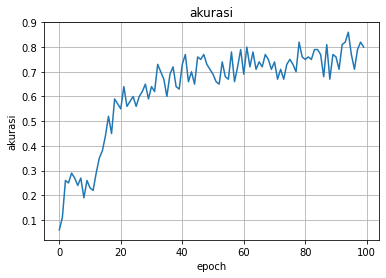

In [42]:
sumbux=[item[0] for item in graph]
sumbuy=[item[1] for item in graph]
# print(sumbuy)
plt.plot(sumbux, sumbuy)
plt.yscale('linear')
plt.title('akurasi')
plt.xlabel('epoch')
plt.ylabel('akurasi')
plt.axis('auto')
plt.grid(True)

In [0]:
# target_dict = {
#  0: 'T-shirt/top',
#  1: 'Trouser',
#  2: 'Pullover',
#  3: 'Dress',
#  4: 'Coat',
#  5: 'Sandal',
#  6: 'Shirt',
#  7: 'Sneaker',
#  8: 'Bag',
#  9: 'Ankle boot',
# }

In [0]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(fashion_mnist.test.images[i].reshape(28,28), cmap=plt.cm.binary)
#     plt.xlabel(fashion_mnist.test.labels[i])
# plt.show()